## Coding attention mechanism
In this chapter **Sebastian** proposes four different implementation of the attention mechanism. The main goal is to aarrive at a compact and efficent implementation of multi-head attention.

**[1]** *Simplified self-attention* - **[2]** *Self-attention* - **[3]** *Causal attention* - **[4]** *Multi-head attention*

Let introduce the concepts of encoder and decoder. Deep neural network are composed by these two different sub-module (already used during RNN period).
In general, encoder's goal is to process the entire input text into a hidden state, which gives a general overview of the internal state of the model and
next the decoder takes in this hidden state to produce the output.

Inspired by Bahdanau attention mechanism, researcher released *transformer architecture* only three years later than RNN.

**Self-attention mechanism** is a mechanism that allows each position in the input sequence to consider the relevancy of, or "attend to", all other positions in the same sequence when computing the representation of a sequence. Self-attention is a key component of contemporary LLMs based on the transformer architecture, such as the GPT series.



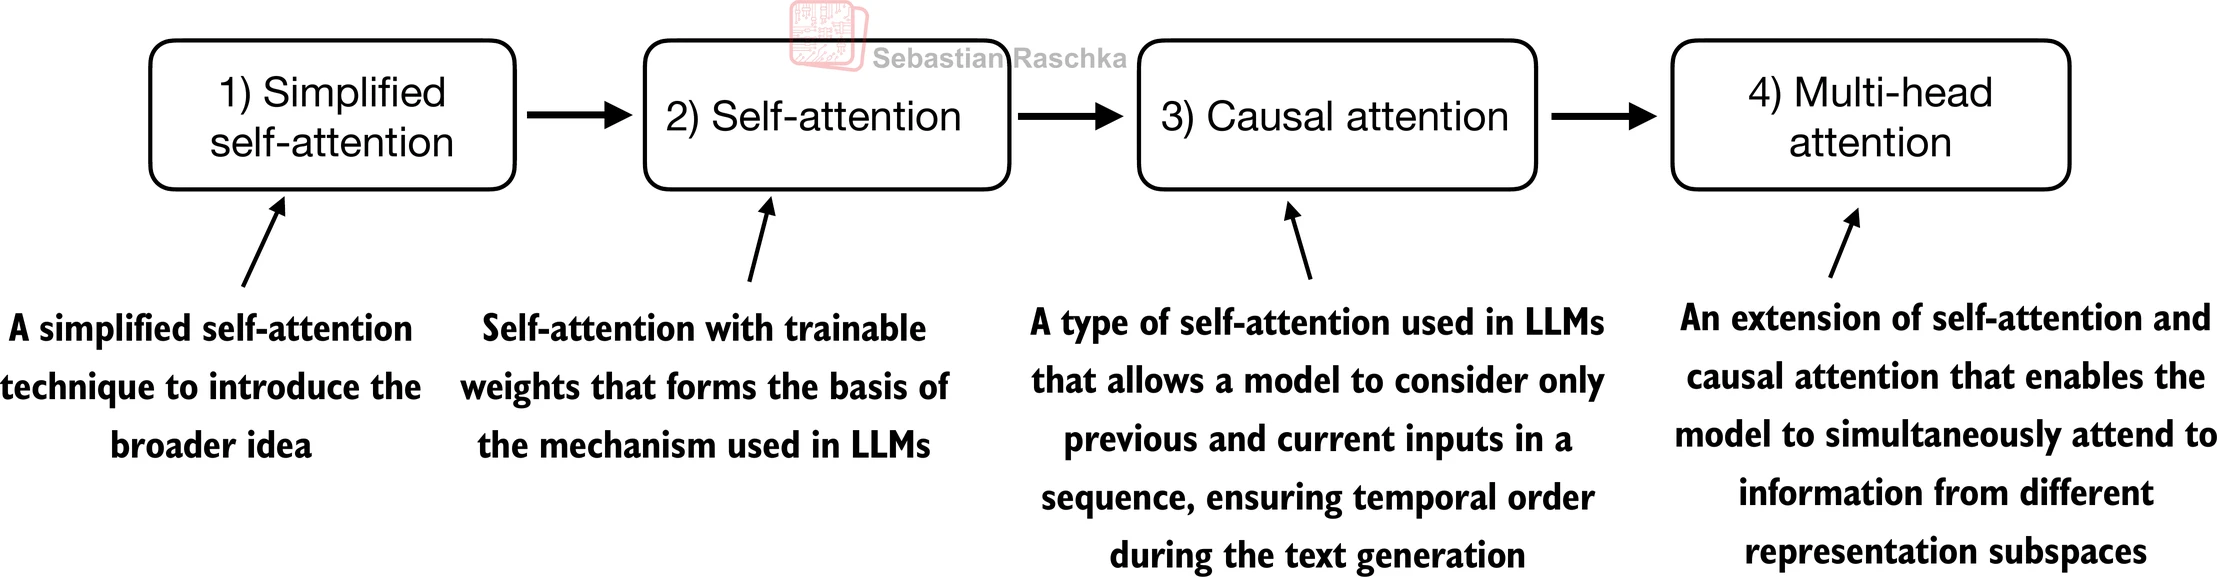

##### Explanation
In self-attention, the "self" refers to the mechanism's ability to compute attention weights by relating different positions within a single input sequence.It assesses and learns the relationships and dependencies between various parts of the input itself, such as words in a sentence or pixels in a image.

The expected output are context vectors for each input element that combines information from all other input elements weighted with respect to input element.

**Context vectors** play a crucial role in self-attention. Their purpose is to create **enriched** representation of each element in an input sequence by incorporating infromation from all other elements in the sequences.

In [ ]:
from importlib.metadata import version
print("torch version:", version("torch"))

#### Simplified self-attention

- Step 1. compute unnormalized attention scores applying dot-product to each element with the query matrix (in this case is the second input token)

In [ ]:
import torch

# rows = samples
# columns = features

inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)

In [ ]:
query = inputs[1]  # 2nd input token is the query

# computing z^2 which is the context vector referring query^2
attn_scores_2 = torch.empty(inputs.shape[0])
for i, x_i in enumerate(inputs):
    attn_scores_2[i] = torch.dot(x_i, query) # dot product (transpose not necessary here since they are 1-dim vectors)

"""
dot-product come from the multiplication of two vectors elements-wise and summing the resulting products.
    for idx, element in enumerate(inputs[0]):
        res += inputs[0][idx] * query[idx]
"""

print(attn_scores_2)